<a href="https://colab.research.google.com/github/a-dhingra/JupyterNotebooks/blob/master/Seaborn_scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn

%matplotlib inline

In [3]:
sn.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
data = sn.load_dataset('tips')
data[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
data.isnull().sum().sort_values(ascending=False)

size          0
time          0
day           0
smoker        0
sex           0
tip           0
total_bill    0
dtype: int64

In [6]:
data.shape

(244, 7)

Tips Given by Sex

In [7]:
data.groupby('sex')['tip'].sum()

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64

Tips given by meal

In [8]:
data.groupby('time')['tip'].sum()

time
Lunch     185.51
Dinner    546.07
Name: tip, dtype: float64

In [9]:
data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [74]:
sn.set_theme(style="darkgrid")


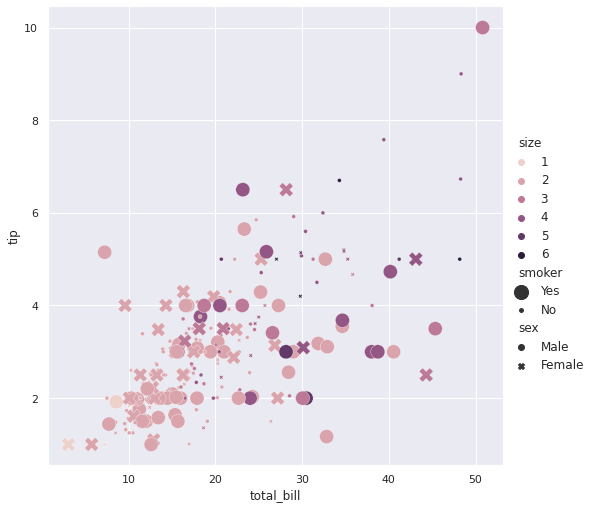

In [77]:
sn.relplot(x='total_bill', y='tip', data=data, hue='size', style='sex', height=7, size='smoker', sizes=(15,200))

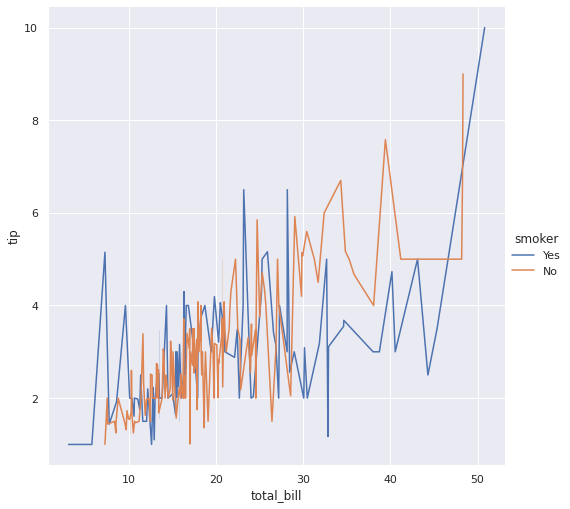

In [83]:
sn.relplot(x='total_bill', y='tip', data=data, hue='smoker', height=7, kind='line')

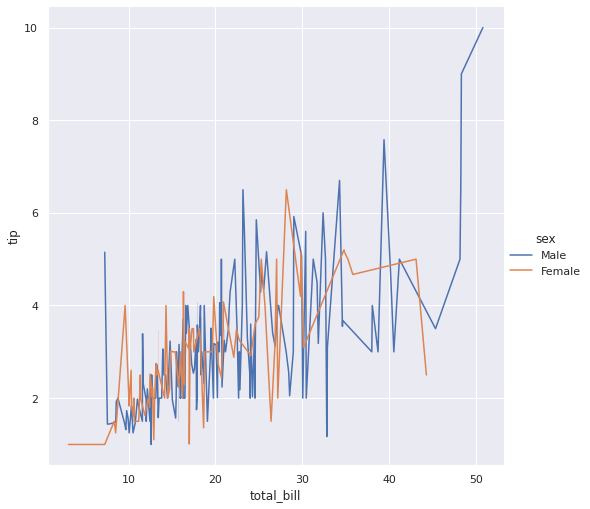

In [86]:
sn.relplot(x='total_bill', y='tip', data=data, hue='sex', height=7, kind='line')

**Variance of tips v/s total_bill, based on sex**

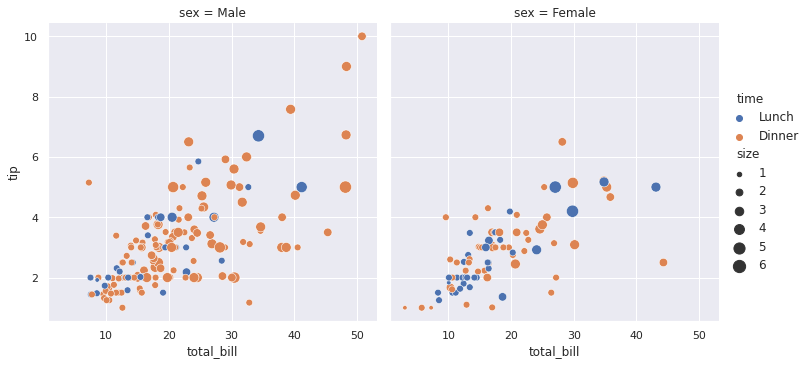

In [101]:
sn.relplot(x='total_bill', y='tip', size='size', hue='time', col='sex', sizes=(20,150), data=data)

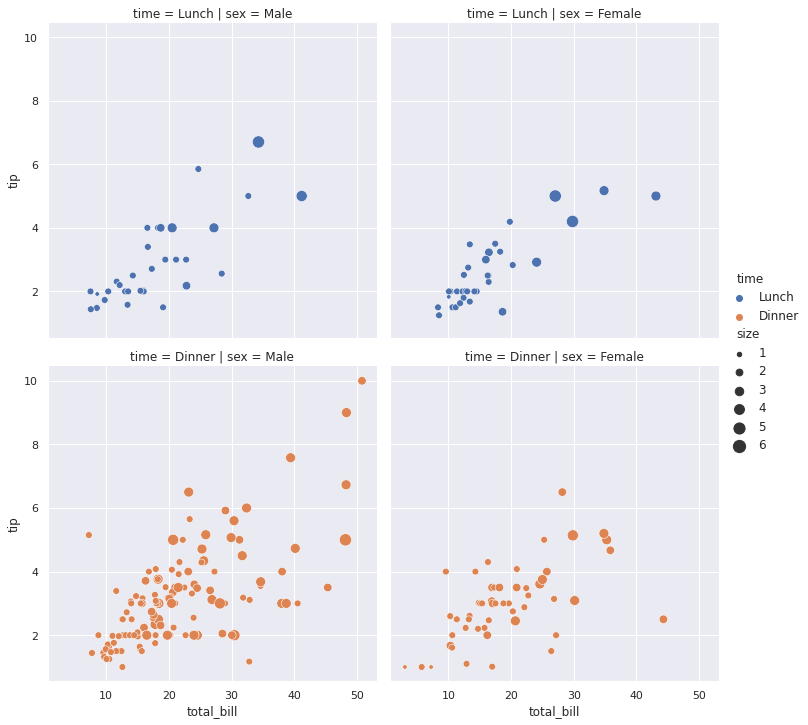

In [108]:
sn.relplot(x='total_bill', y='tip', size='size', hue='time', col='sex', row='time', sizes=(20,150), data=data)

In [84]:
fmri= sn.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


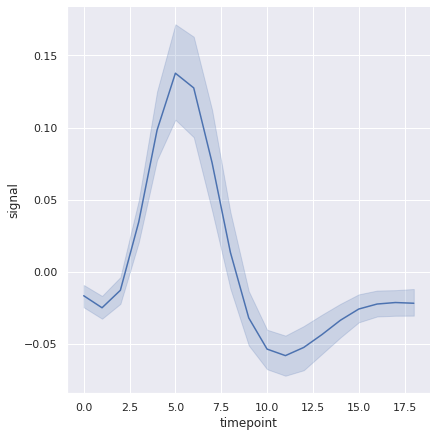

In [87]:
sn.relplot(x='timepoint',y='signal',kind='line', data=fmri, height=6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f789866bc50>]],
      dtype=object)

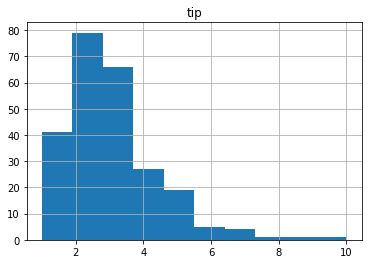

In [10]:
data.hist(column='tip')

In [11]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
sn.set_style('white')

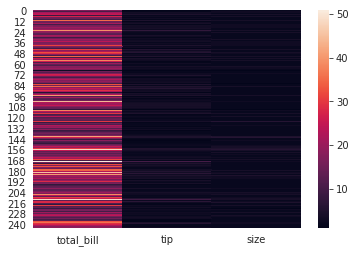

In [13]:
sn.heatmap(data[['total_bill','tip','size']])

In [14]:
LL = lambda x:x.index() in len(data['day'].unique())
# LL = [x for x.index() in list(data['day'])]
LL

<function __main__.<lambda>>

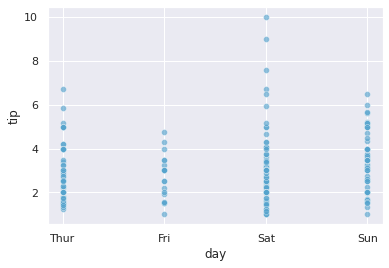

In [15]:
sn.set_theme(context='notebook', style='darkgrid',font='sans-serif', palette='icefire')
sn.scatterplot(x=data['day'],y=data['tip'], alpha=0.65)

In [16]:
data[['tip','size']].corr()

,tip,size
tip,1.000000,0.489299
size,0.489299,1.000000


In [17]:
df = data.copy()

In [18]:
df['smoker_bin'] = np.where(df['smoker']=='No',1,2)

df['smoker_bin'].value_counts()

1    151
2     93
Name: smoker_bin, dtype: int64

In [19]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,smoker_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1


In [20]:
df['day_bin'] = np.where(df['day']=='No',1,2)

In [21]:
import pandas_profiling

In [22]:
dir(pandas_profiling)

['DEFAULT_OUTPUTFILE',
 'NO_OUTPUTFILE',
 'ProfileReport',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'codecs',
 'describe',
 'formatters',
 'plot',
 'report',
 'templates',
 'to_html']

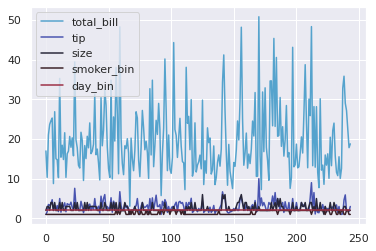

In [23]:
df.plot()


In [24]:
x = (lambda y:y + 2)(2)

In [25]:
minus_one = lambda y:y-1

In [26]:
minus_one(4)

3

In [27]:
import math

In [28]:
log_one = lambda y : math.log(y)

In [29]:
log_one(1)

0.0

In [30]:
log_one(100)

4.605170185988092

In [31]:
log_one(100) + log_one(100)

9.210340371976184

In [36]:
y = [round(log_one(x),3) for x in range(1,20)]
y

[0.0,
 0.693,
 1.099,
 1.386,
 1.609,
 1.792,
 1.946,
 2.079,
 2.197,
 2.303,
 2.398,
 2.485,
 2.565,
 2.639,
 2.708,
 2.773,
 2.833,
 2.89,
 2.944]

In [51]:
# sn.scatterplot(x=pd.Series(range(1,20)), y=y,hue=y/2,alpha=0.65)
# pd.DataFrame(range(1,20))
df0 = pd.DataFrame(data=y)
df0.head(2)

,0
0,0.000
1,0.693
